- This program merges OEC (with opportunity variables) and GTA dataset

# TODO

- OK Investigate left-only merge

- Investigate right-only merge

# Loading packages

In [1]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the ambience

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
work_dir                            = '/content/gdrive/My Drive/ip_complexity/sum_stats'
output_dir                          = '/content/gdrive/My Drive/ip_complexity/sum_stats/output'
create_finaldataset_dir              = '/content/gdrive/My Drive/ip_complexity/create_finaldataset/output/data'


In [4]:
pd.set_option('display.float_format', '{:.4f}'.format) # only shows 2 decimal numbers

# Oppening OEC dataset

In [16]:
# Specify the columns to be imported as strings
columns_as_strings = ['state_act_id','intervention_id','hs4_id']

# Read the CSV file and set the specified columns' data types as string
df = pd.read_csv(create_finaldataset_dir + "/oec_gta_dataset.csv", dtype={col: str for col in columns_as_strings} )

In [17]:
df.describe( )

,year,country_eci,hs4_pci,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca,tv_relatedness
count,2831577.0000,2830644.0000,2817610.0000,2817610.0000,2817610.0000,2817610.0000,2831527.0000,2831527.0000
mean,2015.7483,0.9150,0.2091,0.0727,-0.1205,-0.0027,1.3733,0.3449
std,3.6411,0.5551,1.0168,0.3785,4.6465,1.4363,3.5284,0.1324
min,2007.0000,-2.3705,-3.5582,-1.8604,-919.8455,-254.3203,0.0000,0.0013
25%,2013.0000,0.5183,-0.5748,-0.1775,-0.2024,-0.0653,0.2640,0.2588
50%,2015.0000,0.9741,0.4386,0.1048,0.1133,0.0238,0.6921,0.3664
75%,2019.0000,1.3951,1.0044,0.3230,0.7368,0.2671,1.4835,0.4415
max,2021.0000,2.2607,3.1534,1.7367,143.0993,49.6823,639.2207,0.9479


In [18]:
df[df['gta_evaluation'] == "Red"].describe()

,year,country_eci,hs4_pci,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca,tv_relatedness
count,2007306.0000,2007126.0000,1997980.0000,1997980.0000,1997980.0000,1997980.0000,2007285.0000,2007285.0000
mean,2015.7583,0.9410,0.1765,0.0730,-0.0893,0.0096,1.3895,0.3639
std,3.5868,0.5253,1.0248,0.3966,4.2863,1.3986,3.2700,0.1245
min,2007.0000,-2.3705,-3.5582,-1.8604,-919.8455,-254.3203,0.0000,0.0013
25%,2013.0000,0.5614,-0.6242,-0.2034,-0.2479,-0.0816,0.3078,0.2899
50%,2015.0000,0.9741,0.3844,0.1049,0.1139,0.0275,0.7379,0.3823
75%,2019.0000,1.3957,0.9966,0.3487,0.7800,0.2879,1.5776,0.4501
max,2021.0000,2.2607,3.1534,1.7367,116.2207,49.6823,639.2207,0.9479


In [19]:
df[(df['gta_evaluation'] == "Green")].describe()

,year,country_eci,hs4_pci,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca,tv_relatedness
count,737085.0000,736334.0000,733581.0000,733581.0000,733581.0000,733581.0000,737056.0000,737056.0000
mean,2016.0779,0.8346,0.2989,0.0737,-0.2191,-0.0385,1.3575,0.2991
std,3.6070,0.6195,0.9936,0.3315,5.3868,1.4966,4.1634,0.1406
min,2008.0000,-2.3705,-3.5582,-1.3943,-659.6010,-162.3348,0.0000,0.0017
25%,2013.0000,0.4390,-0.4259,-0.1078,-0.1146,-0.0296,0.1900,0.1623
50%,2016.0000,0.8185,0.5538,0.1074,0.1165,0.0198,0.5844,0.3088
75%,2020.0000,1.3722,1.0585,0.2609,0.6312,0.1933,1.3389,0.4145
max,2021.0000,2.2607,3.1534,1.6403,143.0993,25.1989,322.4768,0.7454


In [20]:
df[(df['gta_evaluation'] == "Red") & (df["country"] == "Brazil") ].describe()

,year,country_eci,hs4_pci,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca,tv_relatedness
count,81369.0000,81369.0000,81273.0000,81273.0000,81273.0000,81273.0000,81369.0000,81369.0000
mean,2012.8520,0.6597,0.2575,0.0248,-0.7620,-0.1745,1.4446,0.1611
std,3.0769,0.0835,0.9531,0.1616,4.8611,1.0435,3.4793,0.0281
min,2007.0000,0.3303,-3.5431,-0.8167,-58.8037,-17.3535,0.0000,0.0928
25%,2010.0000,0.6582,-0.3937,-0.0655,-0.1094,-0.0186,0.1843,0.1409
50%,2013.0000,0.6715,0.4932,0.0771,0.1056,0.0150,0.4105,0.1577
75%,2015.0000,0.6968,0.9712,0.1400,0.3459,0.0517,1.0029,0.1768
max,2021.0000,0.7522,2.5532,0.3815,13.3859,2.4847,42.8146,0.4186


In [22]:
df[(df['gta_evaluation'] == "Green") & (df["country"] == "Brazil") ].describe()

,year,country_eci,hs4_pci,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca,tv_relatedness
count,107913.0000,107913.0000,107856.0000,107856.0000,107856.0000,107856.0000,107913.0000,107913.0000
mean,2017.3908,0.5248,0.8810,0.1189,0.1134,0.0052,0.5721,0.1454
std,3.0170,0.1366,0.6957,0.1041,2.2063,0.4621,1.6512,0.0221
min,2008.0000,0.3303,-2.8921,-0.9208,-58.8037,-17.3535,0.0000,0.0774
25%,2015.0000,0.4390,0.6102,0.0878,0.0720,0.0097,0.1116,0.1305
50%,2018.0000,0.5174,0.9884,0.1381,0.1957,0.0267,0.2385,0.1415
75%,2020.0000,0.6715,1.3503,0.1840,0.3895,0.0570,0.4981,0.1551
max,2021.0000,0.7434,2.5532,0.3198,11.9333,2.3994,37.4057,0.3593


In [23]:
df[(df['gta_evaluation'] == "Red") & (df["country"] == "Brazil") & (df["year"] == 2021)].describe()

,year,country_eci,hs4_pci,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca,tv_relatedness
count,2815.0000,2815.0000,2815.0000,2815.0000,2815.0000,2815.0000,2815.0000,2815.0000
mean,2021.0000,0.3303,1.0463,0.1313,0.1691,0.0105,0.4509,0.1310
std,0.0000,0.0000,0.5617,0.0747,2.3173,0.5723,1.5003,0.0163
min,2021.0000,0.3303,-1.9259,-0.4788,-58.8037,-17.3535,0.0000,0.0995
25%,2021.0000,0.3303,0.7333,0.0971,0.0808,0.0107,0.1116,0.1216
50%,2021.0000,0.3303,1.0213,0.1344,0.2479,0.0289,0.1904,0.1282
75%,2021.0000,0.3303,1.4212,0.1830,0.3534,0.0475,0.3936,0.1369
max,2021.0000,0.3303,2.1668,0.2350,3.9580,0.6821,36.2465,0.2951


In [24]:
df[(df['gta_evaluation'] == "Red") & (df["country"] == "Brazil") & (df["year"] == 2021)].sort_values(by = "opportunity_index_1", ascending = False).T

,2430423,2430602,2430596,2430597,2430598,2430599,2430600,2430601,2430603,2430693,...,2485186,2536070,2485207,2485208,2694110,2485211,2485210,2694139,2485202,2485203
year,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
country,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,...,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
country_id,sabra,sabra,sabra,sabra,sabra,sabra,sabra,sabra,sabra,sabra,...,sabra,sabra,sabra,sabra,sabra,sabra,sabra,sabra,sabra,sabra
country_eci,0.3303,0.3303,0.3303,0.3303,0.3303,0.3303,0.3303,0.3303,0.3303,0.3303,...,0.3303,0.3303,0.3303,0.3303,0.3303,0.3303,0.3303,0.3303,0.3303,0.3303
state_act_id,47537,49024,48764,48764,48764,49024,49024,49024,49024,60872,...,47454,60460,47454,47454,62400,48220,47454,62400,47453,47453
intervention_id,84519,86639,86288,86288,86288,86639,86639,86639,86639,99464,...,84395,98910,84395,84395,101665,85555,84395,101665,84394,84394
gta_evaluation,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
_merge,both,both,both,both,both,both,both,both,both,both,...,both,both,both,both,both,both,both,both,both,both
affected_sectors,"439, 442, 449, 461, 482, 492","432, 449","449, 482","449, 461","449, 481","439, 449, 461","432, 449, 461","439, 449","432, 449, 481","435, 449",...,"011, 235, 239",219,"011, 231","231, 239","011, 012, 013, 014, 015, 016, 017, 018, 019, 0...","235, 241","011, 235, 239","011, 012, 013, 014, 015, 016, 017, 018, 019, 0...","011, 014",014
currently_in_force,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,no,yes,no,no,yes,yes,no,yes,no,no


In [ ]:
df[(df['gta_evaluation'] == "Red") & (df["country"] == "United States") & (df["year"] == 2021) ].describe()

,year,country_eci,state_act_id,intervention_id,protectionist,liberal,amber,hs4_id,hs4_pci,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca,tv_rca_bigger_1,tv_relatedness
count,19411.0000,19411.0000,19411.0000,19411.0000,19411.0000,19411.0000,19411.0000,19411.0000,19354.0000,19354.0000,19354.0000,19354.0000,19411.0000,19411.0000,19411.0000
mean,2021.0000,1.4634,59670.6276,99541.4939,1.0000,0.0000,0.0000,6951.5030,0.3789,0.1526,0.4356,0.1791,0.7245,0.2377,0.3531
std,0.0000,0.0000,4819.7515,7196.1941,0.0000,0.0000,0.0000,1551.0651,0.8170,0.2924,0.9063,0.3884,0.6664,0.4257,0.0412
min,2021.0000,1.4634,47032.0000,83802.0000,1.0000,0.0000,0.0000,201.0000,-2.7568,-0.9366,-10.2289,-3.6374,0.0036,0.0000,0.2313
25%,2021.0000,1.4634,60978.0000,99627.0000,1.0000,0.0000,0.0000,7210.0000,-0.2002,-0.0677,-0.0244,-0.0079,0.2959,0.0000,0.3260
50%,2021.0000,1.4634,61183.0000,100432.0000,1.0000,0.0000,0.0000,7224.0000,0.4779,0.1697,0.2291,0.0642,0.5046,0.0000,0.3494
75%,2021.0000,1.4634,61788.0000,101082.0000,1.0000,0.0000,0.0000,7325.0000,1.0158,0.3483,0.7580,0.2767,0.9501,0.0000,0.3744
max,2021.0000,1.4634,72554.0000,116269.0000,1.0000,0.0000,0.0000,9617.0000,2.3864,1.2233,12.0136,6.1585,5.1701,1.0000,0.5333


In [ ]:
df[(df['gta_evaluation'] == "Red") & (df["country"] == "China") & (df["year"] == 2021) ].describe()

,year,country_eci,state_act_id,intervention_id,protectionist,liberal,amber,hs4_id,hs4_pci,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca,tv_rca_bigger_1,tv_relatedness
count,555.0000,555.0000,555.0000,555.0000,555.0000,555.0000,555.0000,555.0000,555.0000,555.0000,555.0000,555.0000,555.0000,555.0000,555.0000
mean,2021.0000,1.0708,50031.6703,87697.9405,1.0000,0.0000,0.0000,6466.4306,0.6094,0.2959,0.5785,0.2852,0.8465,0.3351,0.4604
std,0.0000,0.0000,4536.1836,5281.6288,0.0000,0.0000,0.0000,2802.8471,0.8447,0.3671,0.7501,0.3950,0.6872,0.4725,0.0567
min,2021.0000,1.0708,47678.0000,84722.0000,1.0000,0.0000,0.0000,1001.0000,-2.4364,-0.8486,-1.8939,-1.0146,0.0003,0.0000,0.2965
25%,2021.0000,1.0708,48527.0000,85979.0000,1.0000,0.0000,0.0000,3003.0000,0.2747,0.1048,0.0481,0.0203,0.3672,0.0000,0.4259
50%,2021.0000,1.0708,48527.0000,85979.0000,1.0000,0.0000,0.0000,8526.0000,0.7933,0.3416,0.5229,0.2601,0.6885,0.0000,0.4516
75%,2021.0000,1.0708,48527.0000,85979.0000,1.0000,0.0000,0.0000,9025.0000,1.1232,0.5553,0.9311,0.4230,1.0961,1.0000,0.4914
max,2021.0000,1.0708,68877.0000,111132.0000,1.0000,0.0000,0.0000,9033.0000,1.9178,1.0470,4.0682,2.2321,3.0775,1.0000,0.6279


In [ ]:
df[df['gta_evaluation'] == "Green"].describe()

,year,country_eci,state_act_id,intervention_id,protectionist,liberal,amber,hs4_id,hs4_pci,opportunity_index_1,opportunity_index_2,opportunity_index_3,tv_rca,tv_rca_bigger_1,tv_relatedness
count,737085.0000,736334.0000,737085.0000,737085.0000,737085.0000,737085.0000,737085.0000,737085.0000,733581.0000,733581.0000,733581.0000,733581.0000,737056.0000,737056.0000,737056.0000
mean,2016.0779,0.8346,35019.1380,68146.2583,0.0000,1.0000,0.0000,5836.0208,0.2989,0.0737,-0.2191,-0.0385,1.3575,0.3358,0.2991
std,3.6070,0.6195,19873.6858,30378.5326,0.0000,0.0000,0.0000,2947.3388,0.9936,0.3315,5.3868,1.4966,4.1634,0.4723,0.1406
min,2008.0000,-2.3705,148.0000,9153.0000,0.0000,1.0000,0.0000,101.0000,-3.5582,-1.3943,-659.6010,-162.3348,0.0000,0.0000,0.0017
25%,2013.0000,0.4390,12569.0000,57729.0000,0.0000,1.0000,0.0000,2935.0000,-0.4259,-0.1078,-0.1146,-0.0296,0.1900,0.0000,0.1623
50%,2016.0000,0.8185,36377.0000,71561.0000,0.0000,1.0000,0.0000,7113.0000,0.5538,0.1074,0.1165,0.0198,0.5844,0.0000,0.3088
75%,2020.0000,1.3722,46917.0000,85283.0000,0.0000,1.0000,0.0000,8482.0000,1.0585,0.2609,0.6312,0.1933,1.3389,1.0000,0.4145
max,2021.0000,2.2607,73184.0000,117271.0000,0.0000,1.0000,0.0000,9706.0000,3.1534,1.6403,143.0993,25.1989,322.4768,1.0000,0.7454


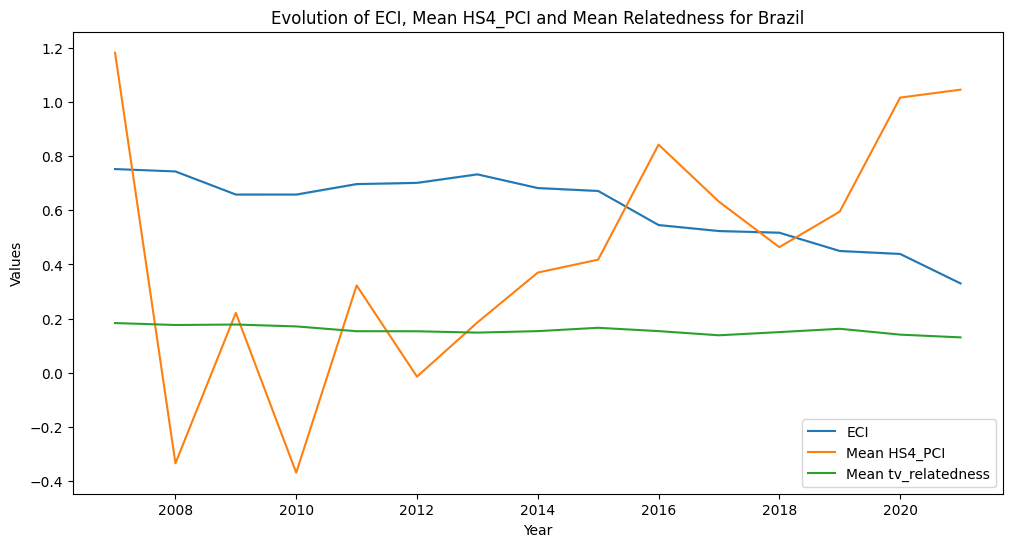

In [ ]:



# Assuming you have a DataFrame called 'df' containing the necessary columns

# Filter the DataFrame for country == "China"
filtered_df = df[(df["country"] == "Brazil") & (df['gta_evaluation'] != "Green")]

# Calculate the mean of "hs4_pci" for each year
mean_hs4_pci = filtered_df.groupby("year")["hs4_pci"].mean().reset_index()

# Calculate the mean of "hs4_relatedness" for each year
mean_hs4_relatedness = filtered_df.groupby("year")["tv_relatedness"].mean().reset_index()

# Plot the evolution of "eci" and mean of "hs4_pci" using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x="year", y="country_eci", label="ECI")
sns.lineplot(data=mean_hs4_pci, x="year", y="hs4_pci", label="Mean HS4_PCI")
sns.lineplot(data=mean_hs4_relatedness, x="year", y="tv_relatedness", label="Mean tv_relatedness")
plt.title("Evolution of ECI, Mean HS4_PCI and Mean Relatedness for Brazil")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.show()


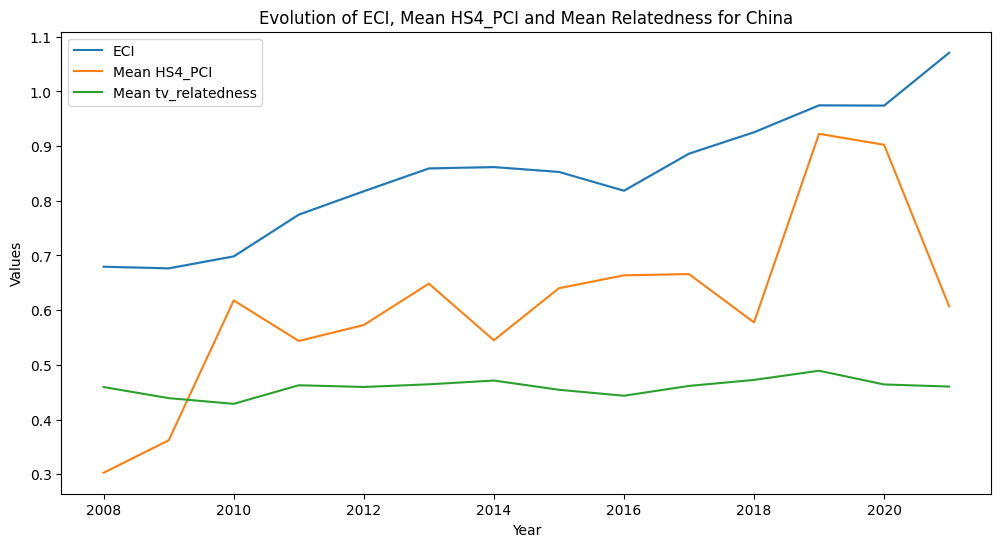

In [ ]:

# Assuming you have a DataFrame called 'df' containing the necessary columns

# Filter the DataFrame for country == "China"
filtered_df = df[(df["country"] == "China") & (df['gta_evaluation'] != "Green")]

# Calculate the mean of "hs4_pci" for each year
mean_hs4_pci = filtered_df.groupby("year")["hs4_pci"].mean().reset_index()

# Calculate the mean of "hs4_relatedness" for each year
mean_hs4_relatedness = filtered_df.groupby("year")["tv_relatedness"].mean().reset_index()

# Plot the evolution of "eci" and mean of "hs4_pci" using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x="year", y="country_eci", label="ECI")
sns.lineplot(data=mean_hs4_pci, x="year", y="hs4_pci", label="Mean HS4_PCI")
sns.lineplot(data=mean_hs4_relatedness, x="year", y="tv_relatedness", label="Mean tv_relatedness")
plt.title("Evolution of ECI, Mean HS4_PCI and Mean Relatedness for China")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.show()

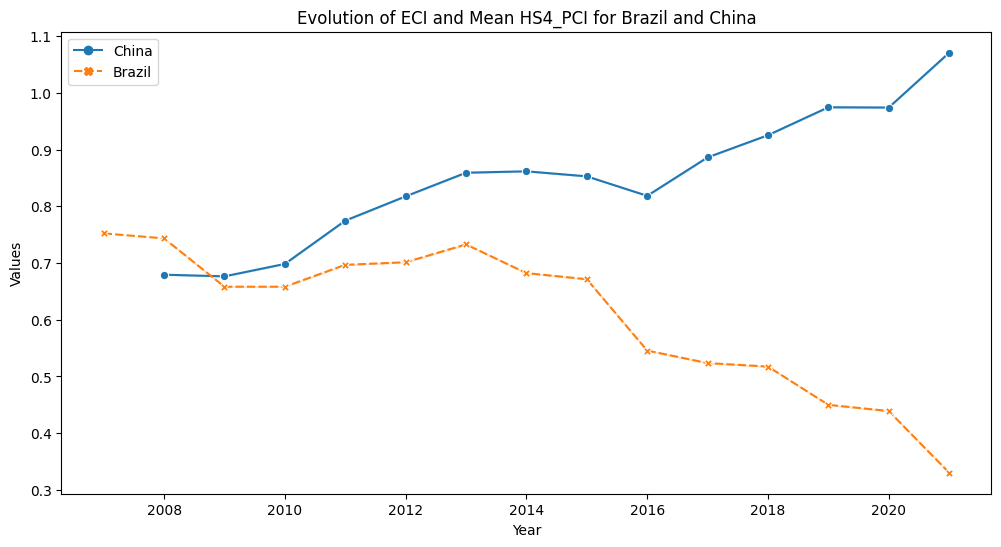

In [ ]:

# Assuming you have a DataFrame called 'df' containing the necessary columns

# Filter the DataFrame for country == "Brazil" or country == "China"
filtered_df = df[(df["country"].isin(["Brazil", "China"])) & (df['gta_evaluation'] == "Red")]

# Calculate the mean of "hs4_pci" for each year for both countries
mean_hs4_pci = filtered_df.groupby(["year", "country"])["hs4_pci"].mean().reset_index()

# Plot the evolution of "eci" and mean of "hs4_pci" using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x="year", y="country_eci", hue="country", style="country", markers=True)
#sns.lineplot(data=mean_hs4_pci, x="year", y="hs4_pci", hue="country", style="country", markers=True, ci=None)
plt.title("Evolution of ECI and Mean HS4_PCI for Brazil and China")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.show()


<ipython-input-26-cf1e93b07388>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=mean_hs4_pci, x="year", y="hs4_pci", hue="country", style="country", markers=True, ci=None)


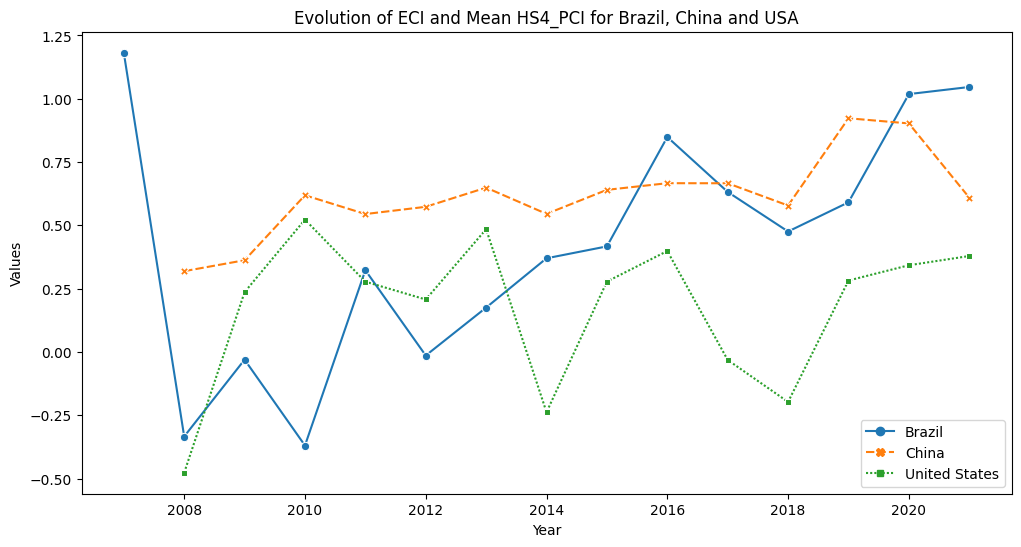

In [ ]:

# Assuming you have a DataFrame called 'df' containing the necessary columns

# Filter the DataFrame for country == "Brazil" or country == "China"
filtered_df = df[(df["country"].isin(["Brazil", "China", "United States"])) & (df['gta_evaluation'] == "Red")]

# Calculate the mean of "hs4_pci" for each year for both countries
mean_hs4_pci = filtered_df.groupby(["year", "country"])["hs4_pci"].mean().reset_index()

# Plot the evolution of "eci" and mean of "hs4_pci" using seaborn
plt.figure(figsize=(12, 6))
#sns.lineplot(data=filtered_df, x="year", y="country_eci", hue="country", style="country", markers=True)
sns.lineplot(data=mean_hs4_pci, x="year", y="hs4_pci", hue="country", style="country", markers=True, ci=None)
plt.title("Evolution of ECI and Mean HS4_PCI for Brazil, China and USA")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.show()